In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

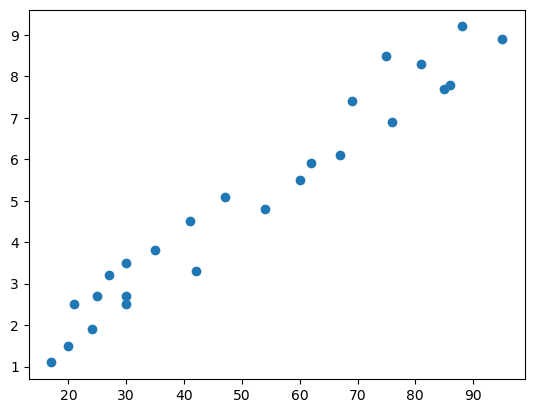

In [4]:
plt.scatter(df.Scores,df.Hours)
plt.show()

From the above graph we can observe that the score and hours are linearly related. As the number of hours increases marks also increases

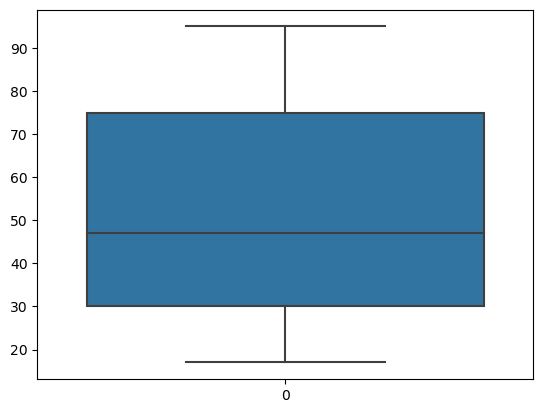

In [5]:
sns.boxplot(df.Scores)
plt.show()

As we can see in the above graph we dnt have any outliers in the data

C:\Users\sai\AppData\Local\Temp\ipykernel_17328\3801377109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Scores)


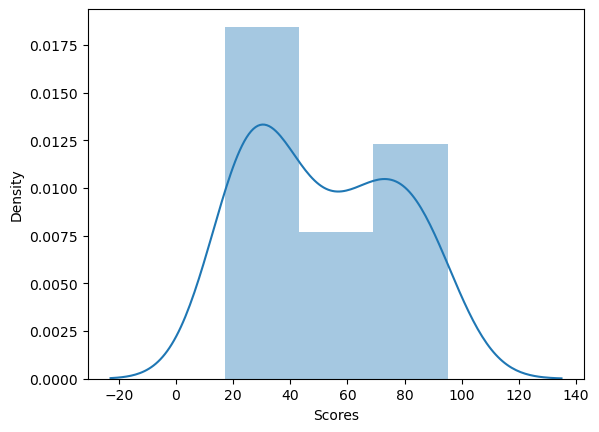

In [6]:
sns.distplot(df.Scores)
plt.show()

From the above graph we can observe that the data is normally distributed so we dnt need to apply any log or sqrt transformation

As the target variable is continuous we will perform linear regression to know the accuracy of the model

# LINEAR REGRESSION 

now lets split the data set into x and y where as x set doesnt have any target variable and y will only have target variable.

In [7]:
X = df.drop('Scores',axis = 1)
y = df['Scores']

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
model=smf.ols(formula='Scores~Hours',data=df).fit()

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           9.13e-17
Time:                        07:33:37   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

In [11]:
# Here we are splitting X,y further into train and test test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()      # here we are defining that lr is linear regression
lr.fit(X_train,y_train)      # Here we are asking model to train based on training set
y_pred = lr.predict(X_test)  # here we are predicting the values based on x_test 

In [13]:
train_score = lr.score(X_train,y_train)    # here we are asking for the score i.e accuracy of training set
print('Train Score = ',train_score)

Train Score =  0.9637848283990599


In [14]:
y_pred_train = lr.predict(X_train)      # ----- i am going to predict y_train     checking over fitting issue
y_pred_test = lr.predict(X_test)

In [15]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train,y_pred_train)
test_score = r2_score(y_test,y_pred_test)

print(f'Training Accuracy = {train_score}\nTesting Accuracy = {test_score}')

Training Accuracy = 0.9637848283990599
Testing Accuracy = 0.8421031525243527
